In [1]:
import pymatgen
import os
import unittest
import warnings
from numbers import Number

from pathlib import Path
#from collections import OrderDict
import numpy as npL
from pymatgen.analysis.phase_diagram import(
     CompoundPhaseDiagram, GrandPotentialPhaseDiagram,
     GrandPotPDEntry, PDEntry,PDPlotter, PhaseDiagram,
      ReactionDiagram,TransformedPDEntry, tet_coord,triangular_coord,uniquelines)

In [7]:
input_data = {"Na":-4.204,"Cr":-18.392183,"F2":-6.9022176, 
              
              "NaF":-13.644,
              "CrF2":-33.586062, "CrF3":-41.559781, "CrF4":-45.891558, "CrF5":-50.192635,  
              
              "Na3CrF6":-83.33422, "Na5Cr3F14":-194.22884,
              "NaCrF3":-47.275375, "NaCrF4":-55.520963, "NaCrF6":-64.58529} 
              

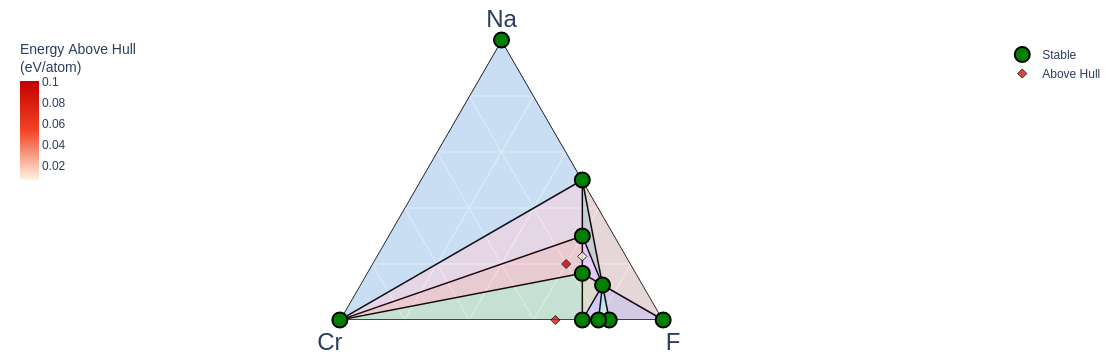

{PDEntry : Cr1 F3 with energy = -41.5598, PDEntry : Na1 F1 with energy = -13.6440, PDEntry : F2 with energy = -6.9022, PDEntry : Cr1 with energy = -18.3922, PDEntry : Cr1 F4 with energy = -45.8916, PDEntry : Cr1 F5 with energy = -50.1926, PDEntry : Na1 with energy = -4.2040, PDEntry : Na1 Cr1 F6 with energy = -64.5853, PDEntry : Na3 Cr1 F6 with energy = -83.3342, PDEntry : Na1 Cr1 F4 with energy = -55.5210}


In [8]:
from pymatgen.analysis.phase_diagram import Composition
entries =[PDEntry(k,v) for k,v in input_data.items()]

phase_diagram_1 = PhaseDiagram(entries)
plotter_1 = PDPlotter(phase_diagram_1, show_unstable=True, label_unstable=True, label_stable=True, markersize=20)
plotter_1.show() 
plotter_1.write_image(stream= 'Na-Cr-F_S.svg', image_format='svg')
print(phase_diagram_1.stable_entries)

In [4]:
decomp_1= phase_diagram_1.get_decomposition(Composition("Mn2F7"))
decomp_1

{PDEntry : Mn1 F3 (MnF3_c) with energy = -38.7160: 0.4444444444444442,
 PDEntry : Mn1 F4 with energy = -42.7552: 0.5555555555555554}

In [7]:
decomp_2= phase_diagram_1.get_decomposition(Composition("Ca1.5Mn2F7"))
decomp_2

{PDEntry : Ca1.5 Mn2 F7 with energy = -109.8283: 1.0}

In [8]:
ehull_1 = phase_diagram_1.get_e_above_hull(PDEntry(  "Ti2F7",-83.612953))

#Returns:- Stable entries should have energy above convex hull of 0. The energy is given per atom.

print("The energy above hull of Ti2F7 is {0} eV/atom.".format(ehull_1))
    

ValueError: Unable to get decomposition for PDEntry : Ti2 F7 with energy = -83.6130

In [9]:
ehull_2 = phase_diagram_1.get_e_above_hull(PDEntry("CaCo2S3O12",-178.321))
print("The energy above hull of Ca2Cr2(SiO4)3 is {0} eV/atom.".format(ehull_2))

ValueError: Unable to get decomposition for PDEntry : Ca1 Co2 S3 O12 with energy = -178.3210

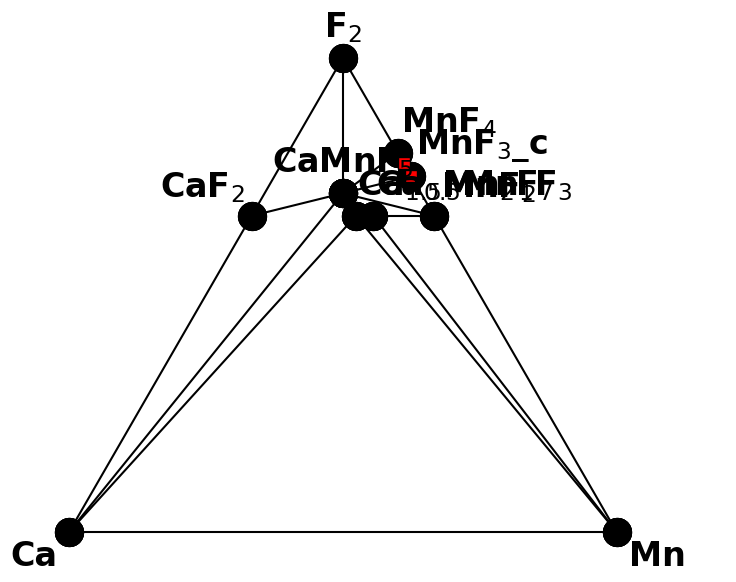

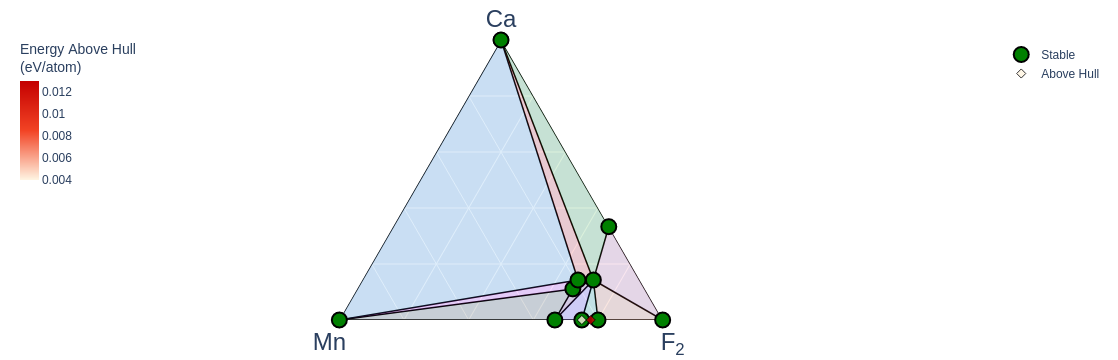

In [11]:
phase_diagram_2 = CompoundPhaseDiagram(entries,[Composition("Ca"),
                                                Composition("Mn"),
                                                Composition("F")])

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, backend = "matplotlib",  markersize=20)
z = compound_plotter_2.get_plot(label_unstable=False, label_stable=True)
#z.savefig('CaxTi2F7.pdf'
)
z.show()   

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable = 0.2, markerize=20)
y = compound_plotter_2.get_plot(phase_diagram_2, label_unstable=True)
y.show()




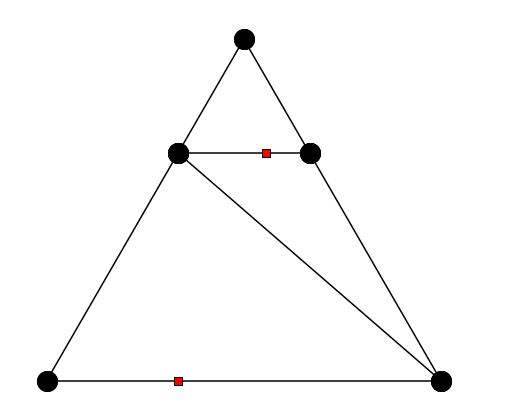

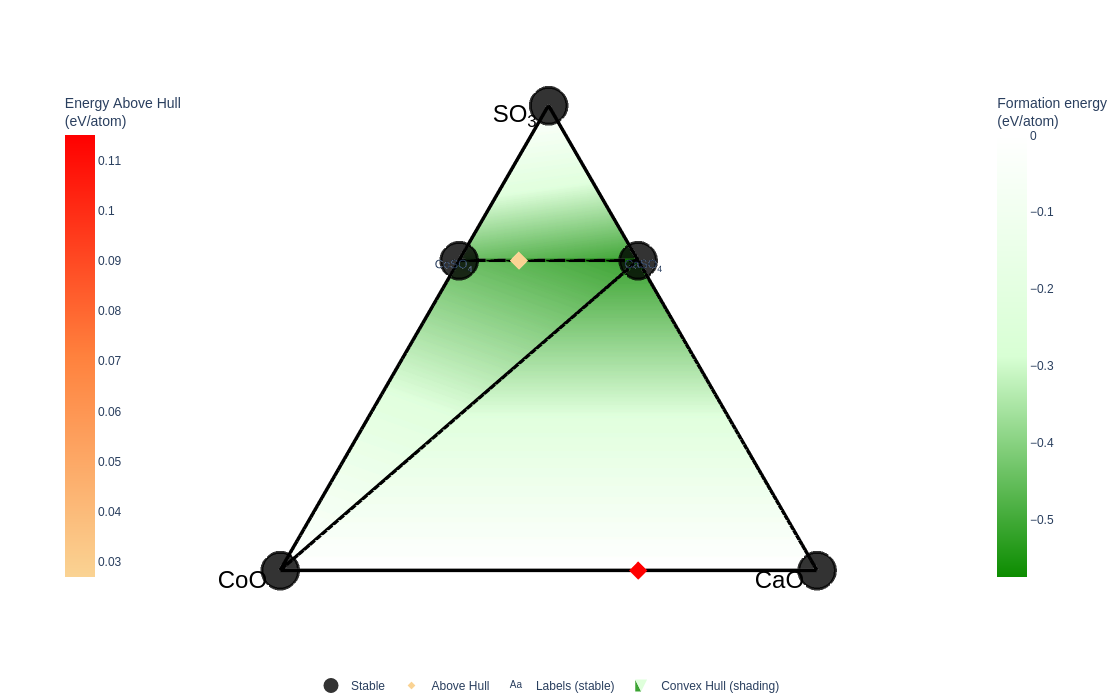

In [9]:
phase_diagram_2 = CompoundPhaseDiagram(entries,[Composition("CaO"),
                                                Composition("CoO"),
                                                Composition("SO3")])

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable=True, backend = "matplotlib",  markersize=20)
z = compound_plotter_2.get_plot(label_unstable=False, label_stable=False)
#z.savefig('40-CaCo2S3O12.pdf')
z.show()   

compound_plotter_2 = PDPlotter(phase_diagram_2, show_unstable = 0.2, markerize=20)
y = compound_plotter_2.get_plot(phase_diagram_2, label_unstable=True)
y.show()



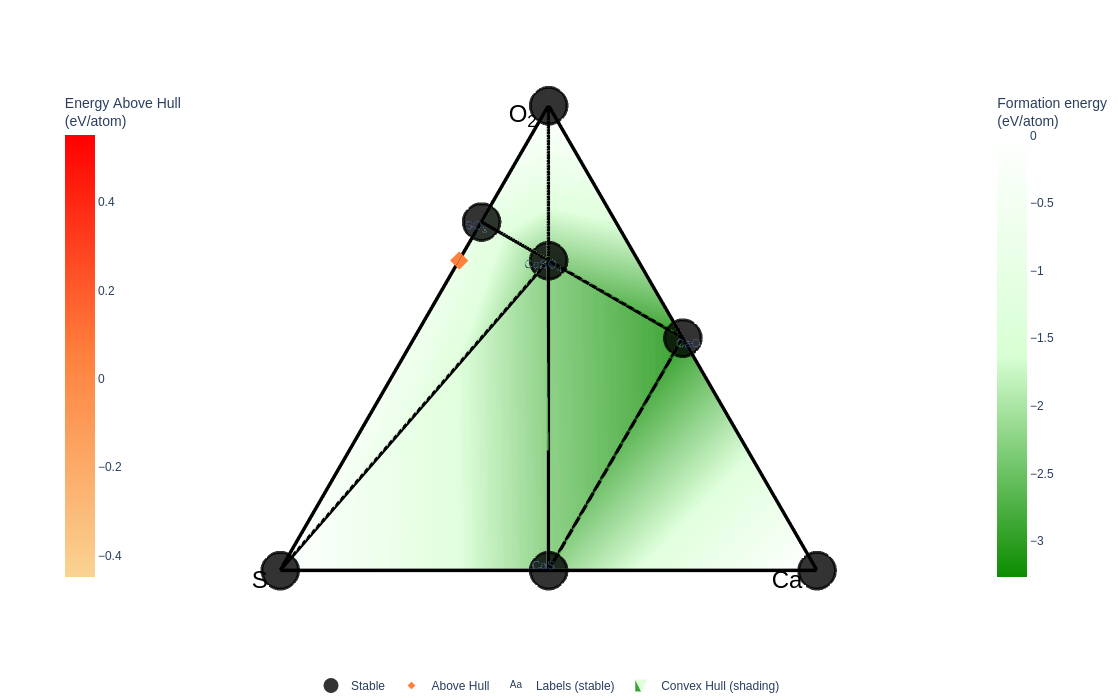

In [10]:
phase_diagram_3 = CompoundPhaseDiagram(entries,[Composition("Ca"),
                                                Composition("S"),
                                                Composition("O2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_3 = PDPlotter(phase_diagram_3, show_unstable=True, markerize=20)
z = compound_plotter_3.get_plot(phase_diagram_3, label_unstable=True)
z.show()

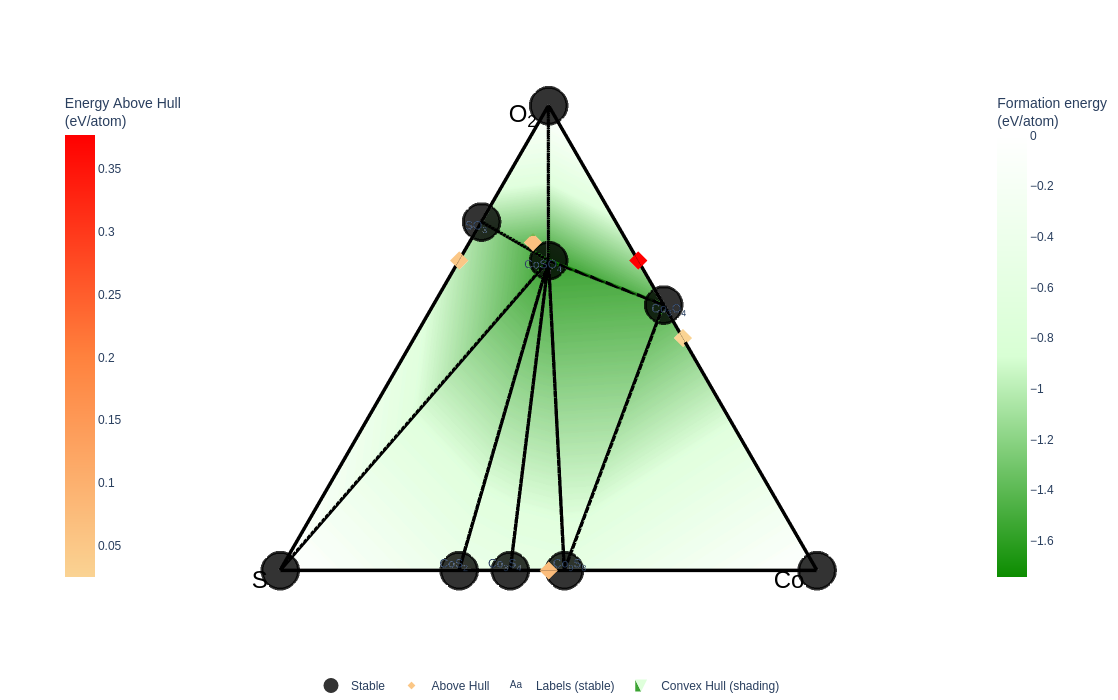

In [11]:
phase_diagram_4 = CompoundPhaseDiagram(entries,[Composition("Co"),
                                                Composition("S"),
                                                Composition("O2")])
#CompoundPhaseDiagram:-Generates phase diagrams from compounds as terminations instead of elements


#get_plot and show:- Draw the phase diagram using Plotly (or Matplotlib) and show it.

compound_plotter_4 = PDPlotter(phase_diagram_4, show_unstable=True, markerize=20)
z = compound_plotter_4.get_plot(phase_diagram_4, label_unstable=True)
z.show()